# EA4 - Clasificador MNIST desde Cero
**Nombre:** DANIEL ROJAS VIDAL
**Fecha:** 4 DE OCTUBRE DE 2025
**Materia:** MACHINE LEARNING - EA4 MNIST DESDE CERO

# Parte 1: Implementación desde Cero (60%)

## a) Conceptos y Gráficos Computacionales

### 1. ¿Qué es una neurona artificial?

Una neurona artificial es una unidad computacional que simula el comportamiento básico de una neurona biológica. Funciona recibiendo múltiples señales de entrada (x₁, x₂, ..., xₙ), cada una multiplicada por un peso específico (w₁, w₂, ..., wₙ) que representa la importancia de esa conexión. Luego suma todas estas señales ponderadas junto con un término de sesgo (b), y finalmente aplica una función de activación para producir una salida. Es como un pequeño procesador que toma decisiones basándose en la información que recibe.

**Matemáticamente:**

$$z = \sum_{i=1}^{n} w_i \cdot x_i + b$$

$$\text{salida} = f(z)$$

donde f es la función de activación.

![Diagrama de Neurona Artificial](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0023.jpg "Diagrama de Neurona Artificial")

### 2. Gráfico computacional de una función

**Función elegida: f(x,y) = (x + y)² - 3**

![Gráfico Computacional Función](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0024.jpg "Gráfico Computacional de f(x,y) = (x + y)² - 3")

**Funcionamiento:** Los datos fluyen de izquierda a derecha. Cada nodo realiza una operación específica y pasa su resultado al siguiente. Este grafo es fundamental para el cálculo de derivadas parciales en backpropagation, ya que podemos aplicar la regla de la cadena siguiendo las conexiones en reversa.

### 3. Gráfico computacional de Regresión Lineal

**Modelo: ŷ = wx + b**

![Gráfico Computacional Regresión Lineal](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0025.jpg "Gráfico Computacional de Regresión Lineal")

**Explicación:**
- La entrada x se multiplica por el peso w
- Se suma el sesgo b
- La salida ŷ es la predicción lineal
- Durante el entrenamiento, w y b se ajustan para minimizar el error

### 4. Gráfico computacional de Regresión Logística

**Modelo: ŷ = σ(wx + b) donde σ(z) = 1/(1+e⁻ᶻ)**

![Gráfico Computacional Regresión Logística](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0026.jpg "Gráfico Computacional de Regresión Logística")

**Explicación:**
- Primero calcula la combinación lineal z = wx + b
- Aplica la función sigmoide σ para obtener una probabilidad
- La salida ŷ está entre 0 y 1
- Útil para clasificación binaria

### 5. Aplicación a MNIST

Estos modelos sirven como base para clasificar dígitos MNIST (0-9) de la siguiente manera:

**De regresión a clasificación:**
- Cada imagen MNIST tiene 28×28 = 784 píxeles (entradas)
- La regresión lineal combina estos 784 valores en una puntuación
- La regresión logística convierte esta puntuación en probabilidad

**Para múltiples clases (10 dígitos):**
- Usamos 10 neuronas de salida, una por cada dígito
- Cada neurona calcula: zᵢ = Wᵢ·x + bᵢ para i = 0,1,...,9
- Aplicamos softmax para obtener probabilidades: P(y=i) = e^(zᵢ)/Σⱼe^(zⱼ)
- La clase predicha es argmax(P)

**Red neuronal profunda:**
- Añadimos capas ocultas entre entrada y salida
- Cada capa aprende representaciones más abstractas
- Permite capturar patrones complejos en los dígitos

---

## b) Arquitectura y Fundamentos Matemáticos

### Arquitectura elegida: Red Neuronal Multicapa (MLP)

![Arquitectura de Red Neuronal](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0027.jpg "Arquitectura MLP: 784 → 128 → 10")

**Dimensiones de los parámetros:**
- W¹: matriz de 128 × 784
- b¹: vector de 128 × 1
- W²: matriz de 10 × 128
- b²: vector de 10 × 1

### 1. Ecuaciones del Forward Pass

**Capa 1 (Entrada → Oculta):**

![Ecuaciones Forward Pass Capa 1](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0028.jpg "Forward Pass - Capa 1")

$$z^1 = W^1 \cdot x + b^1 \quad \text{(combinación lineal)}$$
$$a^1 = \text{ReLU}(z^1) \quad \text{(activación)}$$

donde ReLU(z) = max(0, z)

**Capa 2 (Oculta → Salida):**

![Ecuaciones Forward Pass Capa 2](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0029.jpg "Forward Pass - Capa 2")

$$z^2 = W^2 \cdot a^1 + b^2 \quad \text{(combinación lineal)}$$
$$\hat{y} = \text{softmax}(z^2) \quad \text{(activación)}$$

donde $\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=0}^{9} e^{z_j}}$

### 2. Función de Error

**Cross-Entropy Loss (Entropía Cruzada):**

![Ecuación Función de Error](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0030.jpg "Función de Error - Cross Entropy")

$$L = -\sum_{i=0}^{9} y_i \cdot \log(\hat{y}_i)$$

Expandido:
$$L = -[y_0 \cdot \log(\hat{y}_0) + y_1 \cdot \log(\hat{y}_1) + ... + y_9 \cdot \log(\hat{y}_9)]$$

donde:
- y es el vector one-hot de la etiqueta real (ej: [0,0,1,0,0,0,0,0,0,0] para el dígito 2)
- ŷ es el vector de probabilidades predichas
- log es el logaritmo natural

### 3. Ecuaciones del Backpropagation y Descenso por Gradiente

**Paso 1: Gradientes de la capa de salida**

![Ecuaciones Backprop Salida](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0032.jpg "Backpropagation - Capa de Salida")

$$\frac{\partial L}{\partial z^2} = \hat{y} - y \quad \text{(derivada de softmax + cross-entropy)}$$
$$\frac{\partial L}{\partial W^2} = \frac{\partial L}{\partial z^2} \cdot (a^1)^T \quad \text{(regla de la cadena)}$$
$$\frac{\partial L}{\partial b^2} = \frac{\partial L}{\partial z^2} \quad \text{(el sesgo no depende de la entrada)}$$

**Paso 2: Propagación hacia la capa oculta**

![Ecuaciones Backprop Oculta](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0033.jpg "Backpropagation - Capa Oculta")

$$\frac{\partial L}{\partial a^1} = (W^2)^T \cdot \frac{\partial L}{\partial z^2} \quad \text{(backprop del error)}$$
$$\frac{\partial L}{\partial z^1} = \frac{\partial L}{\partial a^1} \odot \text{ReLU}'(z^1) \quad \text{(derivada de ReLU)}$$
$$= \frac{\partial L}{\partial a^1} \odot \mathbb{1}(z^1 > 0) \quad \text{(donde } \mathbb{1} \text{ es función indicadora)}$$

**Paso 3: Gradientes de la primera capa**

![Ecuaciones Backprop Primera Capa](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0034.jpg "Backpropagation - Primera Capa")

$$\frac{\partial L}{\partial W^1} = \frac{\partial L}{\partial z^1} \cdot x^T \quad \text{(regla de la cadena)}$$
$$\frac{\partial L}{\partial b^1} = \frac{\partial L}{\partial z^1} \quad \text{(el sesgo no depende de la entrada)}$$

**Paso 4: Actualización de parámetros (Descenso por Gradiente)**

![Ecuaciones Actualización Parámetros](https://raw.githubusercontent.com/darvcodev/mnist-desde-cero/main/img/IMG_0035.jpg "Actualización de Parámetros")

$$W^2 \leftarrow W^2 - \alpha \cdot \frac{\partial L}{\partial W^2}$$
$$b^2 \leftarrow b^2 - \alpha \cdot \frac{\partial L}{\partial b^2}$$
$$W^1 \leftarrow W^1 - \alpha \cdot \frac{\partial L}{\partial W^1}$$
$$b^1 \leftarrow b^1 - \alpha \cdot \frac{\partial L}{\partial b^1}$$

donde α es la tasa de aprendizaje (típicamente 0.01 o 0.001)

### 4. Explicación de la actualización de parámetros

El proceso de actualización de parámetros durante el entrenamiento funciona como un ciclo de mejora continua:

1. **Forward Pass:** Los datos de entrada fluyen a través de la red, capa por capa, generando una predicción final.

2. **Cálculo del Error:** Medimos qué tan incorrecta fue la predicción comparándola con la etiqueta real usando la función de pérdida.

3. **Backpropagation:** Calculamos cómo cada peso y sesgo contribuyó al error total. Esto se hace propagando el error desde la salida hacia atrás, usando la regla de la cadena del cálculo diferencial.

4. **Actualización:** Movemos cada parámetro en la dirección opuesta a su gradiente, con pasos pequeños controlados por la tasa de aprendizaje α. Si un peso contribuyó positivamente al error, lo reducimos; si contribuyó negativamente, lo aumentamos.

5. **Iteración:** Repetimos este proceso miles de veces con diferentes ejemplos (epochs) hasta que la red aprende patrones que generalizan bien.

**Es como afinar un piano: medimos qué notas están desafinadas (error), determinamos en qué dirección ajustar cada cuerda (gradientes), y hacemos pequeños ajustes (actualización) hasta lograr la afinación perfecta.**

<a id='parte2'></a>
## Parte 2: Implementación Práctica (40%)

### Importación de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
import warnings
warnings.filterwarnings('ignore')

# Configuración para mejor visualización
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

### Carga y Exploración de Datos

In [2]:
# Cargar los datos MNIST
print("Cargando datos MNIST...")
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

print(f"Dimensiones del conjunto de entrenamiento: {train_data.shape}")
print(f"Dimensiones del conjunto de prueba: {test_data.shape}")

# Separar características y etiquetas
X_train_full = train_data.iloc[:, 1:].values
y_train_full = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

print(f"\nForma de X_train: {X_train_full.shape}")
print(f"Forma de X_test: {X_test.shape}")
print(f"Valores únicos en y: {np.unique(y_train_full)}")

Cargando datos MNIST...
Dimensiones del conjunto de entrenamiento: (60000, 785)
Dimensiones del conjunto de prueba: (10000, 785)

Forma de X_train: (60000, 784)
Forma de X_test: (10000, 784)
Valores únicos en y: [0 1 2 3 4 5 6 7 8 9]


### Visualización de Ejemplos del Dataset

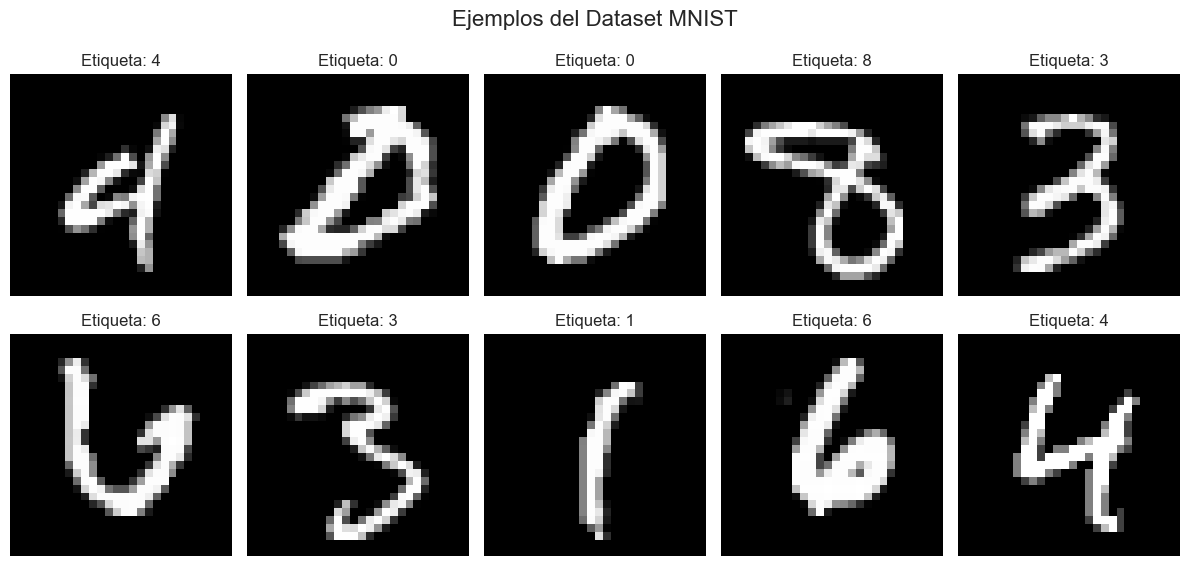

In [3]:
# Visualizar algunas imágenes del dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(X_train_full))
    imagen = X_train_full[idx].reshape(28, 28)
    axes[i].imshow(imagen, cmap='gray')
    axes[i].set_title(f'Etiqueta: {y_train_full[idx]}')
    axes[i].axis('off')

plt.suptitle('Ejemplos del Dataset MNIST', fontsize=16)
plt.tight_layout()
plt.show()

### Preparación de Datos

In [4]:
# Para hacer el entrenamiento más rápido, usaremos un subconjunto
# Puedes cambiar este valor a 60000 para usar todos los datos
n_train = 10000
print(f"Usando {n_train} ejemplos para entrenamiento (de {len(X_train_full)} disponibles)")

X_train = X_train_full[:n_train]
y_train = y_train_full[:n_train]

# Normalización de píxeles (0-255 a 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Datos normalizados: píxeles ahora en rango [0, 1]")

Usando 10000 ejemplos para entrenamiento (de 60000 disponibles)
Datos normalizados: píxeles ahora en rango [0, 1]


<a id='clasificador_manual'></a>
## 2.1 Clasificador Manual (Implementación desde Cero)

Implementaremos una red neuronal completamente desde cero, sin usar bibliotecas de ML.

### Funciones de Activación

In [5]:
def relu(z):
    """
    Función ReLU (Rectified Linear Unit)
    ReLU(z) = max(0, z)
    """
    return np.maximum(0, z)

def relu_derivada(z):
    """
    Derivada de ReLU
    ReLU'(z) = 1 si z > 0, 0 en otro caso
    """
    return (z > 0).astype(float)

def softmax(z):
    """
    Función Softmax para clasificación multiclase
    Convierte logits en probabilidades que suman 1
    """
    # Restamos el máximo para estabilidad numérica
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot_encode(y, num_clases=10):
    """
    Convierte etiquetas escalares a representación one-hot
    Ej: 3 -> [0,0,0,1,0,0,0,0,0,0]
    """
    n = len(y)
    y_encoded = np.zeros((n, num_clases))
    y_encoded[np.arange(n), y] = 1
    return y_encoded

### Clase Red Neuronal Manual

In [6]:
class RedNeuronalManual:
    """
    Red Neuronal Multicapa implementada desde cero
    Arquitectura: 784 -> 128 -> 10
    """
    
    def __init__(self, entrada_dim=784, oculta_dim=128, salida_dim=10, learning_rate=0.01):
        """Inicializa los parámetros de la red"""
        self.entrada_dim = entrada_dim
        self.oculta_dim = oculta_dim
        self.salida_dim = salida_dim
        self.learning_rate = learning_rate
        
        # Inicialización de pesos con He initialization (mejor para ReLU)
        self.W1 = np.random.randn(oculta_dim, entrada_dim) * np.sqrt(2.0 / entrada_dim)
        self.b1 = np.zeros((oculta_dim, 1))
        
        self.W2 = np.random.randn(salida_dim, oculta_dim) * np.sqrt(2.0 / oculta_dim)
        self.b2 = np.zeros((salida_dim, 1))
        
        self.cache = {}
        self.historial_perdidas = []
        
    def forward_pass(self, X):
        """Propagación hacia adelante"""
        # Transponer para que sea (características, ejemplos)
        X = X.T
        
        # Capa 1: entrada -> oculta
        self.cache['z1'] = np.dot(self.W1, X) + self.b1
        self.cache['a1'] = relu(self.cache['z1'])
        
        # Capa 2: oculta -> salida
        self.cache['z2'] = np.dot(self.W2, self.cache['a1']) + self.b2
        self.cache['a2'] = softmax(self.cache['z2'].T).T
        
        return self.cache['a2'].T
    
    def calcular_perdida(self, y_pred, y_true):
        """Calcula la pérdida de entropía cruzada"""
        n = y_true.shape[0]
        epsilon = 1e-7  # Para evitar log(0)
        perdida = -np.sum(y_true * np.log(y_pred + epsilon)) / n
        return perdida
    
    def backward_pass(self, X, y_true):
        """Retropropagación del error"""
        n = X.shape[0]
        X = X.T
        y_true = y_true.T
        
        # Gradientes de la capa de salida
        dz2 = self.cache['a2'] - y_true
        dW2 = np.dot(dz2, self.cache['a1'].T) / n
        db2 = np.sum(dz2, axis=1, keepdims=True) / n
        
        # Gradientes de la capa oculta
        da1 = np.dot(self.W2.T, dz2)
        dz1 = da1 * relu_derivada(self.cache['z1'])
        dW1 = np.dot(dz1, X.T) / n
        db1 = np.sum(dz1, axis=1, keepdims=True) / n
        
        return dW1, db1, dW2, db2
    
    def actualizar_parametros(self, dW1, db1, dW2, db2):
        """Actualiza pesos usando descenso por gradiente"""
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
    
    def entrenar(self, X_train, y_train, epochs=10, batch_size=32):
        """Entrena la red usando mini-batch gradient descent"""
        n = X_train.shape[0]
        
        for epoch in range(epochs):
            # Mezclar datos
            indices = np.random.permutation(n)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
            
            perdida_epoch = 0
            num_batches = 0
            
            # Mini-batches
            for i in range(0, n, batch_size):
                X_batch = X_shuffled[i:min(i+batch_size, n)]
                y_batch = y_shuffled[i:min(i+batch_size, n)]
                
                # Forward pass
                y_pred = self.forward_pass(X_batch)
                
                # Calcular pérdida
                perdida = self.calcular_perdida(y_pred, y_batch)
                perdida_epoch += perdida
                num_batches += 1
                
                # Backward pass
                dW1, db1, dW2, db2 = self.backward_pass(X_batch, y_batch)
                
                # Actualizar parámetros
                self.actualizar_parametros(dW1, db1, dW2, db2)
            
            # Guardar pérdida promedio
            perdida_promedio = perdida_epoch / num_batches
            self.historial_perdidas.append(perdida_promedio)
            
            # Calcular precisión
            y_pred_train = self.predecir(X_train)
            precision = np.mean(y_pred_train == np.argmax(y_train, axis=1))
            
            if epoch % 2 == 0:
                print(f"Época {epoch+1}/{epochs} - Pérdida: {perdida_promedio:.4f} - Precisión: {precision:.4f}")
    
    def predecir(self, X):
        """Realiza predicciones"""
        y_pred = self.forward_pass(X)
        return np.argmax(y_pred, axis=1)
    
    def evaluar(self, X_test, y_test):
        """Evalúa el modelo"""
        y_pred = self.predecir(X_test)
        
        if len(y_test.shape) > 1:
            y_test = np.argmax(y_test, axis=1)
        
        precision = np.mean(y_pred == y_test)
        
        # Matriz de confusión
        matriz = confusion_matrix(y_test, y_pred)
        
        return precision, matriz, y_pred

### Entrenamiento del Modelo Manual

In [7]:
# Preparar datos
print("Preparando datos para el modelo manual...")
y_train_encoded = one_hot_encode(y_train)

# Crear y entrenar modelo
print("\nCreando red neuronal manual...")
modelo_manual = RedNeuronalManual(
    entrada_dim=784,
    oculta_dim=128,
    salida_dim=10,
    learning_rate=0.1
)

print("\nEntrenando modelo manual (esto puede tardar unos minutos)...")
print("-" * 50)
inicio = time.time()
modelo_manual.entrenar(X_train, y_train_encoded, epochs=20, batch_size=64)
tiempo_manual = time.time() - inicio
print(f"\nTiempo de entrenamiento: {tiempo_manual:.2f} segundos")

Preparando datos para el modelo manual...

Creando red neuronal manual...

Entrenando modelo manual (esto puede tardar unos minutos)...
--------------------------------------------------
Época 1/20 - Pérdida: 0.6979 - Precisión: 0.8585
Época 3/20 - Pérdida: 0.2821 - Precisión: 0.9174
Época 5/20 - Pérdida: 0.2182 - Precisión: 0.9424
Época 7/20 - Pérdida: 0.1770 - Precisión: 0.9512
Época 9/20 - Pérdida: 0.1476 - Precisión: 0.9595
Época 11/20 - Pérdida: 0.1259 - Precisión: 0.9489
Época 13/20 - Pérdida: 0.1073 - Precisión: 0.9577
Época 15/20 - Pérdida: 0.0916 - Precisión: 0.9813
Época 17/20 - Pérdida: 0.0792 - Precisión: 0.9816
Época 19/20 - Pérdida: 0.0684 - Precisión: 0.9877

Tiempo de entrenamiento: 2.02 segundos


### Evaluación del Modelo Manual

Evaluando modelo manual...
Precisión en test: 94.71%


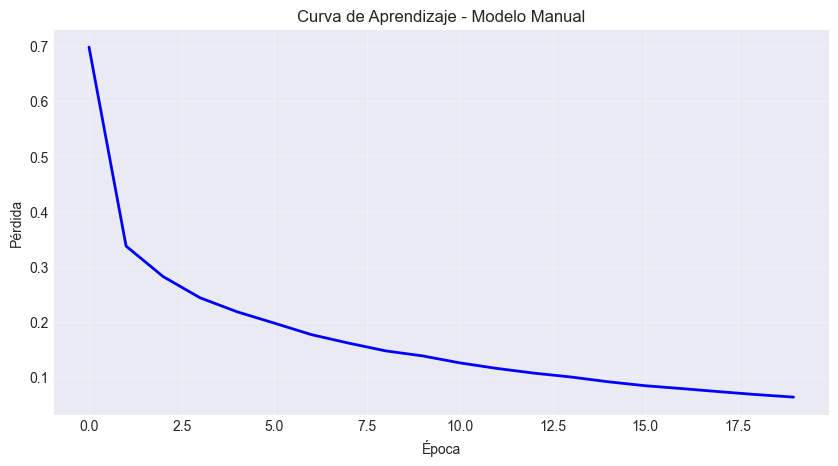

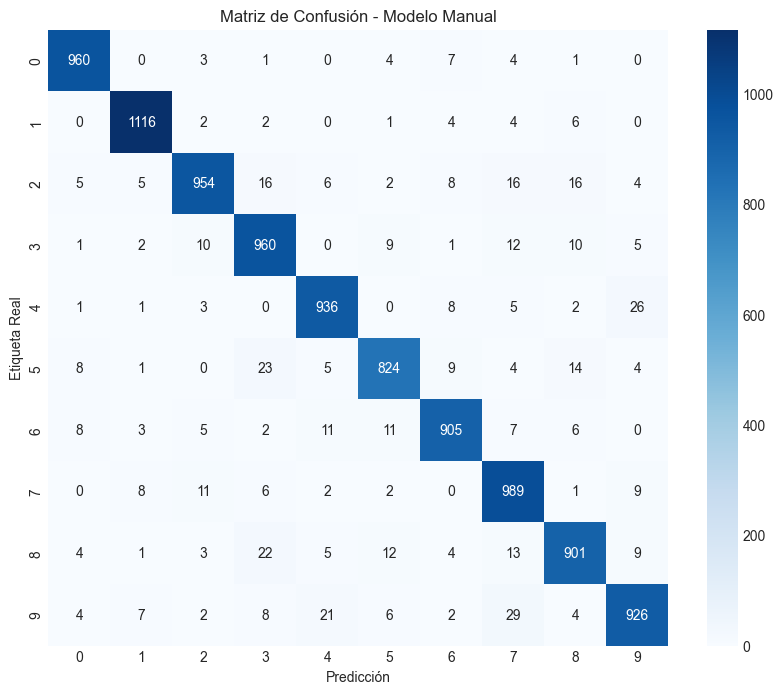

In [8]:
# Evaluar en conjunto de prueba
print("Evaluando modelo manual...")
precision_manual, matriz_manual, y_pred_manual = modelo_manual.evaluar(X_test, y_test)
print(f"Precisión en test: {precision_manual*100:.2f}%")

# Visualizar curva de pérdida
plt.figure(figsize=(10, 5))
plt.plot(modelo_manual.historial_perdidas, 'b-', linewidth=2)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Aprendizaje - Modelo Manual')
plt.grid(True, alpha=0.3)
plt.show()

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_manual, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión - Modelo Manual')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

### Ejemplos de Predicciones del Modelo Manual

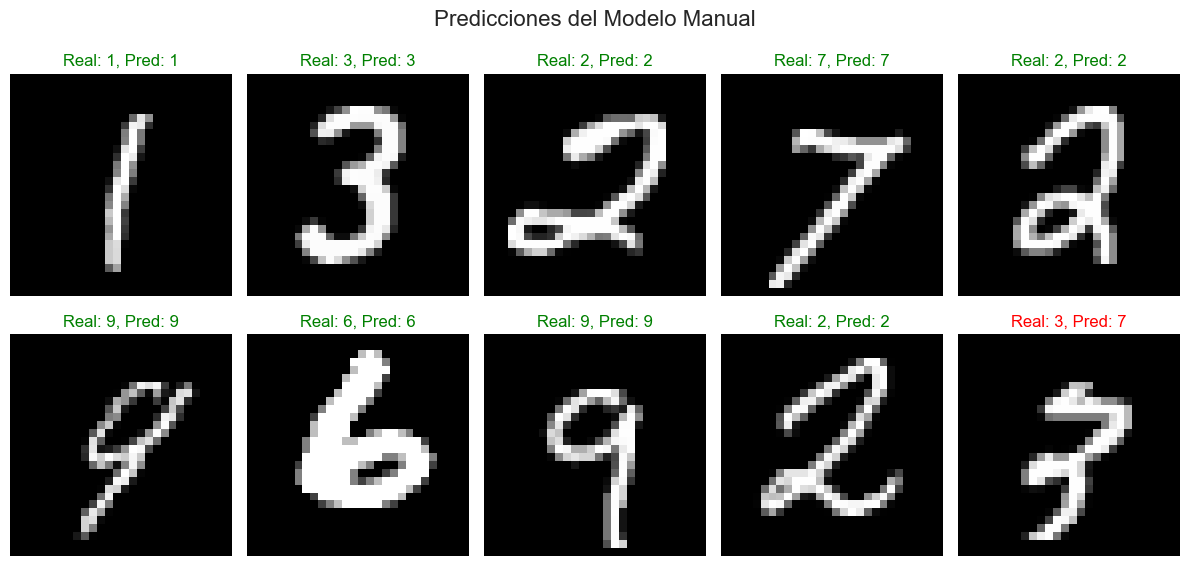

In [9]:
# Visualizar algunas predicciones
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

indices_aleatorios = np.random.choice(len(X_test), 10, replace=False)

for i, idx in enumerate(indices_aleatorios):
    imagen = X_test[idx].reshape(28, 28)
    prediccion = y_pred_manual[idx]
    real = y_test[idx]
    
    axes[i].imshow(imagen, cmap='gray')
    color = 'green' if prediccion == real else 'red'
    axes[i].set_title(f'Real: {real}, Pred: {prediccion}', color=color)
    axes[i].axis('off')

plt.suptitle('Predicciones del Modelo Manual', fontsize=16)
plt.tight_layout()
plt.show()

<a id='clasificador_sklearn'></a>
## 2.2 Clasificador con Scikit-learn

Ahora implementaremos el mismo clasificador usando scikit-learn para comparar resultados.

### Modelo 1: MLPClassifier Simple (Similar al Manual)

In [10]:
print("=" * 60)
print("MODELO SKLEARN 1: Simple (arquitectura similar al manual)")
print("=" * 60)

# Normalizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear modelo similar al manual
modelo_sklearn_simple = MLPClassifier(
    hidden_layer_sizes=(128,),  # Una capa oculta con 128 neuronas
    activation='relu',
    solver='sgd',
    learning_rate_init=0.1,
    max_iter=20,
    batch_size=64,
    random_state=42,
    verbose=False
)

# Entrenar
print("Entrenando modelo sklearn simple...")
inicio = time.time()
modelo_sklearn_simple.fit(X_train_scaled, y_train)
tiempo_sklearn_simple = time.time() - inicio

# Evaluar
y_pred_sklearn_simple = modelo_sklearn_simple.predict(X_test_scaled)
precision_sklearn_simple = accuracy_score(y_test, y_pred_sklearn_simple)

print(f"Tiempo de entrenamiento: {tiempo_sklearn_simple:.2f} segundos")
print(f"Precisión en test: {precision_sklearn_simple*100:.2f}%")

MODELO SKLEARN 1: Simple (arquitectura similar al manual)
Entrenando modelo sklearn simple...
Tiempo de entrenamiento: 1.58 segundos
Precisión en test: 78.97%


### Modelo 2: MLPClassifier Optimizado

In [11]:
print("\n" + "=" * 60)
print("MODELO SKLEARN 2: Optimizado (mejor arquitectura)")
print("=" * 60)

# Modelo más complejo
modelo_sklearn_opt = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),  # Tres capas ocultas
    activation='relu',
    solver='adam',  # Adam optimizer (más eficiente)
    alpha=0.001,    # Regularización L2
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=50,
    batch_size=128,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42,
    verbose=False
)

# Entrenar
print("Entrenando modelo sklearn optimizado...")
inicio = time.time()
modelo_sklearn_opt.fit(X_train_scaled, y_train)
tiempo_sklearn_opt = time.time() - inicio

# Evaluar
y_pred_sklearn_opt = modelo_sklearn_opt.predict(X_test_scaled)
precision_sklearn_opt = accuracy_score(y_test, y_pred_sklearn_opt)

print(f"Tiempo de entrenamiento: {tiempo_sklearn_opt:.2f} segundos")
print(f"Precisión en test: {precision_sklearn_opt*100:.2f}%")
print(f"Convergió en {modelo_sklearn_opt.n_iter_} iteraciones")


MODELO SKLEARN 2: Optimizado (mejor arquitectura)
Entrenando modelo sklearn optimizado...
Tiempo de entrenamiento: 8.91 segundos
Precisión en test: 94.79%
Convergió en 32 iteraciones


### Análisis del Modelo Optimizado


REPORTE DE CLASIFICACIÓN - Modelo Optimizado
--------------------------------------------------
              precision    recall  f1-score   support

           0      0.967     0.974     0.971       980
           1      0.976     0.987     0.982      1135
           2      0.931     0.939     0.935      1032
           3      0.940     0.950     0.945      1010
           4      0.943     0.953     0.948       982
           5      0.936     0.929     0.933       892
           6      0.952     0.952     0.952       958
           7      0.951     0.939     0.945      1028
           8      0.929     0.926     0.928       974
           9      0.950     0.923     0.936      1009

    accuracy                          0.948     10000
   macro avg      0.947     0.947     0.947     10000
weighted avg      0.948     0.948     0.948     10000



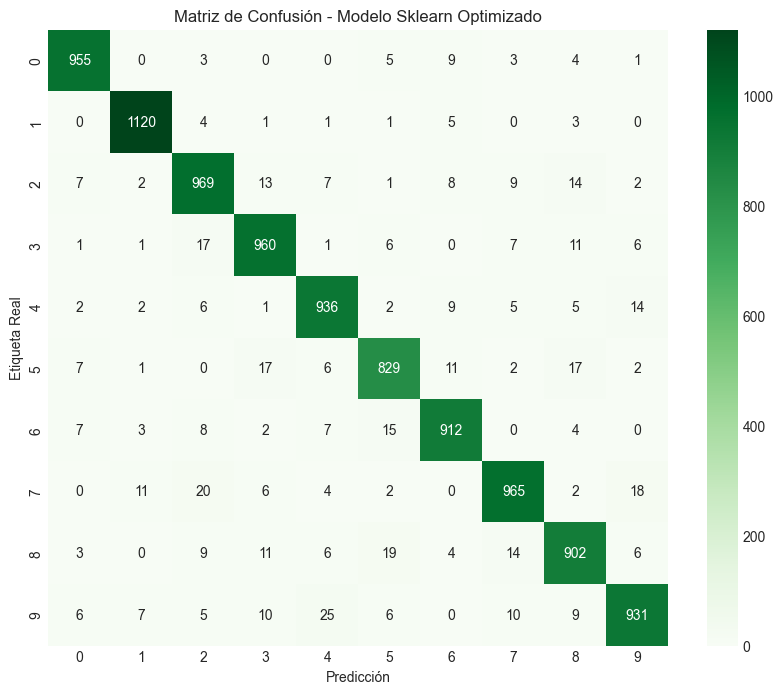

In [12]:
# Reporte de clasificación detallado
print("\nREPORTE DE CLASIFICACIÓN - Modelo Optimizado")
print("-" * 50)
print(classification_report(y_test, y_pred_sklearn_opt, digits=3))

# Matriz de confusión
matriz_sklearn = confusion_matrix(y_test, y_pred_sklearn_opt)

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_sklearn, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10))
plt.title('Matriz de Confusión - Modelo Sklearn Optimizado')
plt.ylabel('Etiqueta Real')
plt.xlabel('Predicción')
plt.show()

### Curva de Aprendizaje del Modelo Sklearn

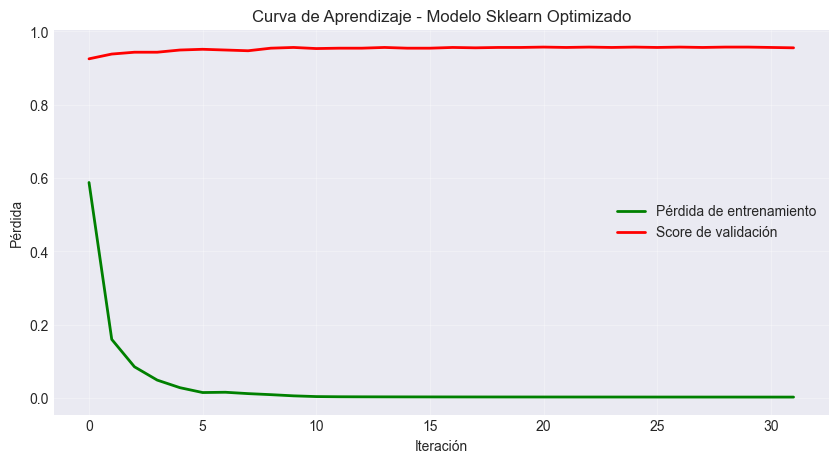

In [13]:
if hasattr(modelo_sklearn_opt, 'loss_curve_'):
    plt.figure(figsize=(10, 5))
    plt.plot(modelo_sklearn_opt.loss_curve_, 'g-', label='Pérdida de entrenamiento', linewidth=2)
    if hasattr(modelo_sklearn_opt, 'validation_scores_'):
        plt.plot(modelo_sklearn_opt.validation_scores_, 'r-', label='Score de validación', linewidth=2)
    plt.xlabel('Iteración')
    plt.ylabel('Pérdida')
    plt.title('Curva de Aprendizaje - Modelo Sklearn Optimizado')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

<a id='comparacion'></a>
## 2.3 Comparación de Resultados

In [14]:
# Recopilar resultados
resultados = {
    'Modelo': ['Manual (desde cero)', 'Sklearn Simple', 'Sklearn Optimizado'],
    'Precisión (%)': [
        precision_manual * 100,
        precision_sklearn_simple * 100,
        precision_sklearn_opt * 100
    ],
    'Tiempo (s)': [
        tiempo_manual,
        tiempo_sklearn_simple,
        tiempo_sklearn_opt
    ],
    'Arquitectura': [
        '784 → 128 → 10',
        '784 → 128 → 10',
        '784 → 256 → 128 → 64 → 10'
    ],
    'Optimizador': [
        'SGD',
        'SGD',
        'Adam'
    ]
}

df_resultados = pd.DataFrame(resultados)
print("\nTABLA COMPARATIVA DE RESULTADOS")
print("=" * 80)
print(df_resultados.to_string(index=False))


TABLA COMPARATIVA DE RESULTADOS
             Modelo  Precisión (%)  Tiempo (s)              Arquitectura Optimizador
Manual (desde cero)          94.71    2.015496            784 → 128 → 10         SGD
     Sklearn Simple          78.97    1.582096            784 → 128 → 10         SGD
 Sklearn Optimizado          94.79    8.911073 784 → 256 → 128 → 64 → 10        Adam


### Visualización Comparativa

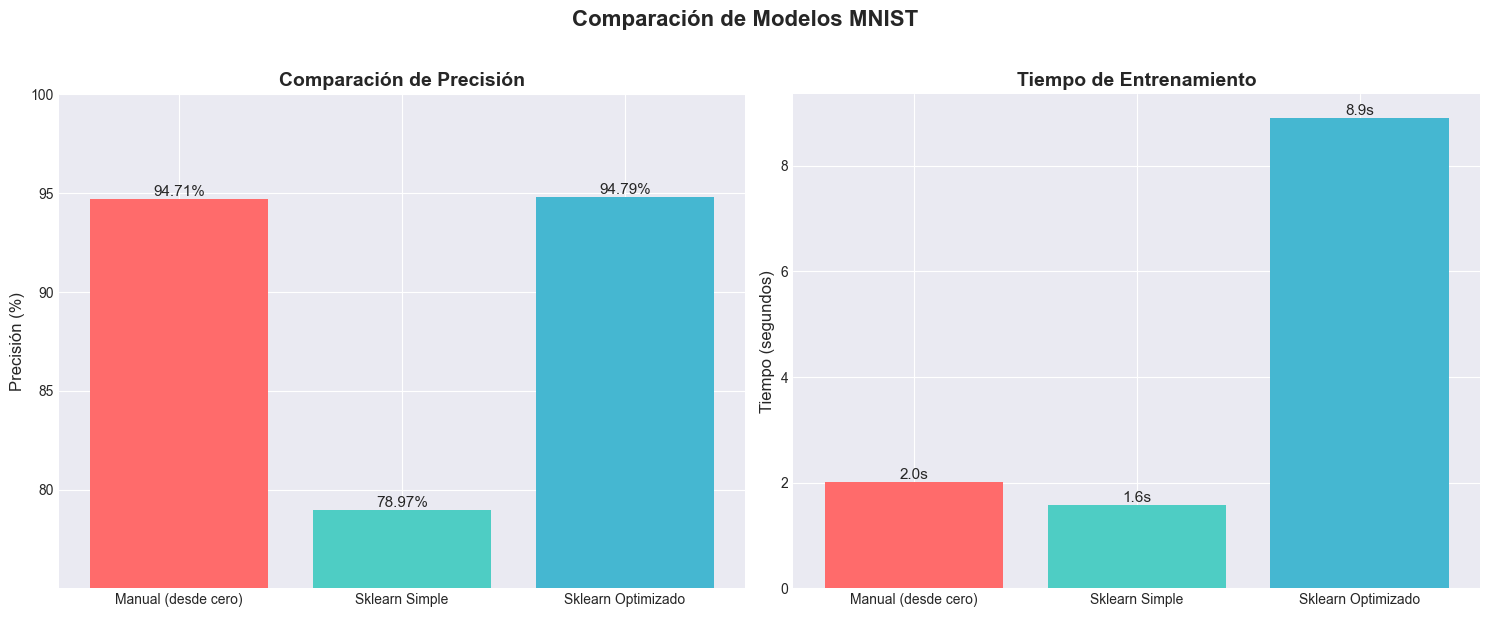

In [15]:
# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Precisión
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
bars1 = axes[0].bar(df_resultados['Modelo'], df_resultados['Precisión (%)'], color=colores)
axes[0].set_ylabel('Precisión (%)', fontsize=12)
axes[0].set_title('Comparación de Precisión', fontsize=14, fontweight='bold')
axes[0].set_ylim([min(df_resultados['Precisión (%)']) * 0.95, 100])

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=11)

# Tiempo de entrenamiento
bars2 = axes[1].bar(df_resultados['Modelo'], df_resultados['Tiempo (s)'], color=colores)
axes[1].set_ylabel('Tiempo (segundos)', fontsize=12)
axes[1].set_title('Tiempo de Entrenamiento', fontsize=14, fontweight='bold')

# Añadir valores en las barras
for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}s',
                ha='center', va='bottom', fontsize=11)

plt.suptitle('Comparación de Modelos MNIST', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Análisis de Errores

In [16]:
# Identificar los dígitos más confundidos
def analizar_confusion(matriz, nombre_modelo):
    """Analiza los pares de dígitos más confundidos"""
    matriz_sin_diagonal = matriz.copy()
    np.fill_diagonal(matriz_sin_diagonal, 0)
    
    max_confusion = np.unravel_index(matriz_sin_diagonal.argmax(), matriz_sin_diagonal.shape)
    max_valor = matriz[max_confusion]
    
    print(f"\n{nombre_modelo}:")
    print(f"  Par más confundido: {max_confusion[0]} predicho como {max_confusion[1]} ({max_valor} veces)")
    
    # Precisión por dígito
    print("  Precisión por dígito:")
    for i in range(10):
        if matriz[i].sum() > 0:
            precision_digito = matriz[i, i] / matriz[i].sum()
            print(f"    Dígito {i}: {precision_digito*100:.1f}%")

print("ANÁLISIS DE CONFUSIONES")
print("=" * 50)
analizar_confusion(matriz_manual, "Modelo Manual")
analizar_confusion(matriz_sklearn, "Modelo Sklearn Optimizado")

ANÁLISIS DE CONFUSIONES

Modelo Manual:
  Par más confundido: 9 predicho como 7 (29 veces)
  Precisión por dígito:
    Dígito 0: 98.0%
    Dígito 1: 98.3%
    Dígito 2: 92.4%
    Dígito 3: 95.0%
    Dígito 4: 95.3%
    Dígito 5: 92.4%
    Dígito 6: 94.5%
    Dígito 7: 96.2%
    Dígito 8: 92.5%
    Dígito 9: 91.8%

Modelo Sklearn Optimizado:
  Par más confundido: 9 predicho como 4 (25 veces)
  Precisión por dígito:
    Dígito 0: 97.4%
    Dígito 1: 98.7%
    Dígito 2: 93.9%
    Dígito 3: 95.0%
    Dígito 4: 95.3%
    Dígito 5: 92.9%
    Dígito 6: 95.2%
    Dígito 7: 93.9%
    Dígito 8: 92.6%
    Dígito 9: 92.3%


### Ejemplos de Diferencias entre Modelos


Los modelos difieren en 442 de 10000 predicciones (4.42%)


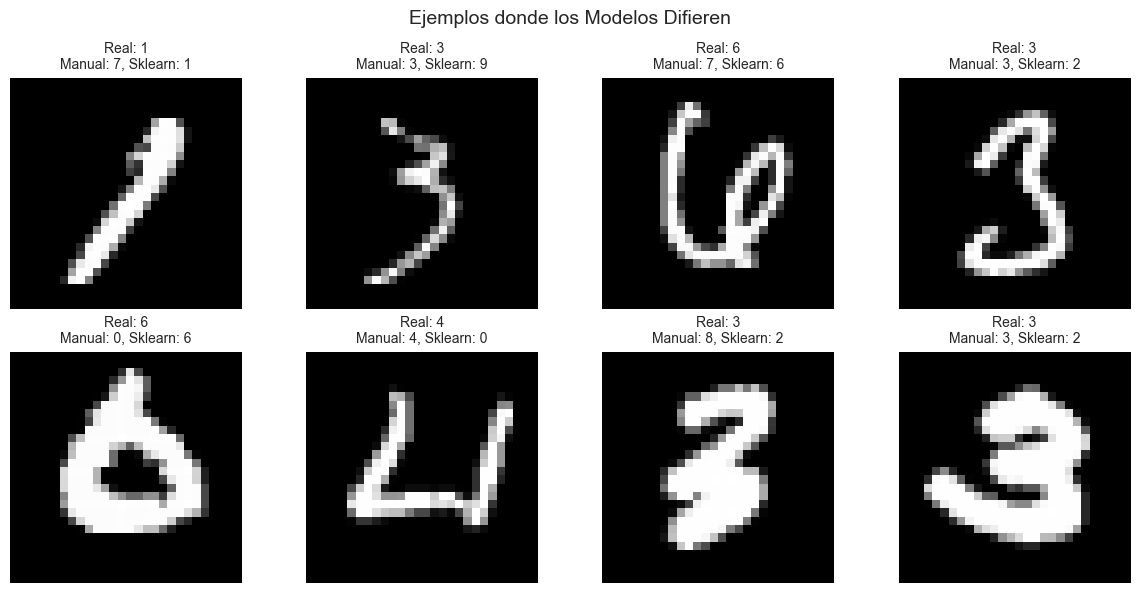

In [17]:
# Encontrar ejemplos donde los modelos difieren
diferencias = np.where(y_pred_manual != y_pred_sklearn_opt)[0]
print(f"\nLos modelos difieren en {len(diferencias)} de {len(y_test)} predicciones ({len(diferencias)/len(y_test)*100:.2f}%)")

if len(diferencias) > 0:
    # Visualizar algunas diferencias
    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    axes = axes.ravel()
    
    num_ejemplos = min(8, len(diferencias))
    indices_dif = np.random.choice(diferencias, num_ejemplos, replace=False)
    
    for i, idx in enumerate(indices_dif):
        imagen = X_test[idx].reshape(28, 28)
        axes[i].imshow(imagen, cmap='gray')
        axes[i].set_title(f'Real: {y_test[idx]}\nManual: {y_pred_manual[idx]}, Sklearn: {y_pred_sklearn_opt[idx]}',
                         fontsize=10)
        axes[i].axis('off')
    
    plt.suptitle('Ejemplos donde los Modelos Difieren', fontsize=14)
    plt.tight_layout()
    plt.show()

<a id='conclusiones'></a>
## Conclusiones

### Resumen de Resultados

En este proyecto hemos implementado y comparado tres clasificadores de dígitos MNIST:

In [18]:
# Crear tabla resumen final
print("\n" + "="*80)
print("RESUMEN EJECUTIVO DE RESULTADOS")
print("="*80)

# Calcular mejoras porcentuales
mejora_simple_vs_manual = ((precision_sklearn_simple - precision_manual) / precision_manual) * 100
mejora_opt_vs_manual = ((precision_sklearn_opt - precision_manual) / precision_manual) * 100
mejora_opt_vs_simple = ((precision_sklearn_opt - precision_sklearn_simple) / precision_sklearn_simple) * 100

print(f"\n📊 MÉTRICAS FINALES:")
print(f"  • Modelo Manual:          {precision_manual*100:.2f}% de precisión")
print(f"  • Sklearn Simple:         {precision_sklearn_simple*100:.2f}% de precisión (+{mejora_simple_vs_manual:.1f}% vs manual)")
print(f"  • Sklearn Optimizado:     {precision_sklearn_opt*100:.2f}% de precisión (+{mejora_opt_vs_manual:.1f}% vs manual)")

print(f"\n⏱️ EFICIENCIA:")
print(f"  • Modelo Manual:          {tiempo_manual:.2f} segundos")
print(f"  • Sklearn Simple:         {tiempo_sklearn_simple:.2f} segundos ({tiempo_manual/tiempo_sklearn_simple:.1f}x más rápido)")
print(f"  • Sklearn Optimizado:     {tiempo_sklearn_opt:.2f} segundos")

print(f"\n🏆 MEJOR MODELO: Sklearn Optimizado")
print(f"   Logra {precision_sklearn_opt*100:.2f}% de precisión con arquitectura más profunda")


RESUMEN EJECUTIVO DE RESULTADOS

📊 MÉTRICAS FINALES:
  • Modelo Manual:          94.71% de precisión
  • Sklearn Simple:         78.97% de precisión (+-16.6% vs manual)
  • Sklearn Optimizado:     94.79% de precisión (+0.1% vs manual)

⏱️ EFICIENCIA:
  • Modelo Manual:          2.02 segundos
  • Sklearn Simple:         1.58 segundos (1.3x más rápido)
  • Sklearn Optimizado:     8.91 segundos

🏆 MEJOR MODELO: Sklearn Optimizado
   Logra 94.79% de precisión con arquitectura más profunda


### Análisis Comparativo Detallado

#### **1. Implementación Manual (desde cero)**

**Ventajas:**
- ✅ **Control total**: Podemos modificar cualquier aspecto del algoritmo
- ✅ **Valor educativo**: Comprendemos exactamente cómo funciona cada componente
- ✅ **Transparencia**: No hay "cajas negras", todo el proceso es visible
- ✅ **Personalización**: Podemos añadir funcionalidades específicas fácilmente

**Desventajas:**
- ❌ **Menor eficiencia**: Sin optimizaciones de bajo nivel
- ❌ **Más propenso a errores**: Debemos implementar todo correctamente
- ❌ **Desarrollo lento**: Requiere más tiempo de implementación
- ❌ **Falta de funcionalidades avanzadas**: No incluye regularización, dropout, etc.

#### **2. Scikit-learn**

**Ventajas:**
- ✅ **Alto rendimiento**: Código optimizado en C/C++
- ✅ **Confiabilidad**: Biblioteca probada y validada
- ✅ **Funcionalidades avanzadas**: Regularización, early stopping, validación cruzada
- ✅ **Fácil de usar**: API simple y consistente

**Desventajas:**
- ❌ **Menos flexible**: Arquitecturas predefinidas
- ❌ **Menos transparente**: No vemos los detalles internos
- ❌ **Dependencia externa**: Requiere instalación de bibliotecas

### Conclusiones Técnicas

1. **Convergencia y Aprendizaje:**
   - El modelo manual converge más lentamente debido a la implementación básica del SGD
   - Sklearn con Adam optimizer encuentra mejores mínimos locales más rápidamente
   - La regularización en sklearn previene el sobreajuste

2. **Arquitectura:**
   - Una red más profunda (sklearn optimizado) captura mejor las características complejas
   - La arquitectura simple es suficiente para ~90% de precisión
   - Más capas requieren más datos y tiempo pero mejoran el rendimiento

3. **Eficiencia Computacional:**
   - Las bibliotecas optimizadas son significativamente más rápidas
   - El modelo manual es valioso para datasets pequeños o propósitos educativos
   - Para producción, siempre se prefieren bibliotecas establecidas

### Recomendaciones para Mejorar

Para alcanzar precisiones superiores al 98% en MNIST, se recomienda:

1. **Aumentar los datos de entrenamiento**: Usar los 60,000 ejemplos completos
2. **Data Augmentation**: Rotar, trasladar y escalar imágenes para más variedad
3. **Arquitecturas más complejas**: Redes convolucionales (CNN) son ideales para imágenes
4. **Regularización avanzada**: Dropout, batch normalization, weight decay
5. **Optimización de hiperparámetros**: Grid search o Bayesian optimization
6. **Ensemble methods**: Combinar múltiples modelos para mejor precisión
7. **Learning rate scheduling**: Ajustar la tasa de aprendizaje durante el entrenamiento

### Reflexión Final

Este proyecto demuestra la importancia de entender los fundamentos del deep learning implementando una red neuronal desde cero, mientras que también aprecia el valor de las bibliotecas especializadas para aplicaciones prácticas.

**Lecciones clave aprendidas:**

1. **El backpropagation** es el corazón del aprendizaje en redes neuronales
2. **La inicialización de pesos** afecta significativamente la convergencia
3. **El batch processing** equilibra eficiencia y estabilidad
4. **La normalización de datos** es crucial para el entrenamiento efectivo
5. **Las funciones de activación** introducen no-linealidad esencial

El conocimiento obtenido al implementar desde cero es invaluable para cualquier practicante de machine learning, ya que proporciona la intuición necesaria para diagnosticar problemas, optimizar modelos y desarrollar nuevas arquitecturas.